In [2]:
import os
import json
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
decore_filepath = "../predictions/truthfulqa/pred_TruthfulQA_LLaMA3-8b-Instruct-DeCoRe-Entropy_80.json"
baseline_filepath = "../predictions/truthfulqa/pred_TruthfulQA_LLaMA3-8b-Instruct-Baseline.json"
dola_filepath = "../predictions/truthfulqa/pred_TruthfulQA_LLaMA3-8b-Instruct-DoLa-low.json"

decore_data = []
with open(decore_filepath, "r") as f:
    for line in f:
        decore_data += [json.loads(line)]

baseline_data = []
with open(baseline_filepath, "r") as f:
    for line in f:
        baseline_data += [json.loads(line)]

dola_data = []
with open(dola_filepath, "r") as f:
    for line in f:
        dola_data += [json.loads(line)]

decore_alphas = [decore_data[i]["alphas"] for i in range(len(decore_data))]
decore_lengths = [len(decore_alphas[i]) for i in range(len(decore_alphas))]

baseline_alphas = [baseline_data[i]["alphas"] for i in range(len(baseline_data))]
baseline_lengths = [len(baseline_alphas[i]) for i in range(len(baseline_alphas))]

dola_alphas = [dola_data[i]["alphas"][0] for i in range(len(dola_data))]
dola_lengths = [len(dola_alphas[i]) for i in range(len(dola_alphas))]

/var/folders/k0/rfk7_0gj54j49sqn7mhwx7qm0000gp/T/ipykernel_59062/2232063829.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kkfn339/miniconda3/envs/decore/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need

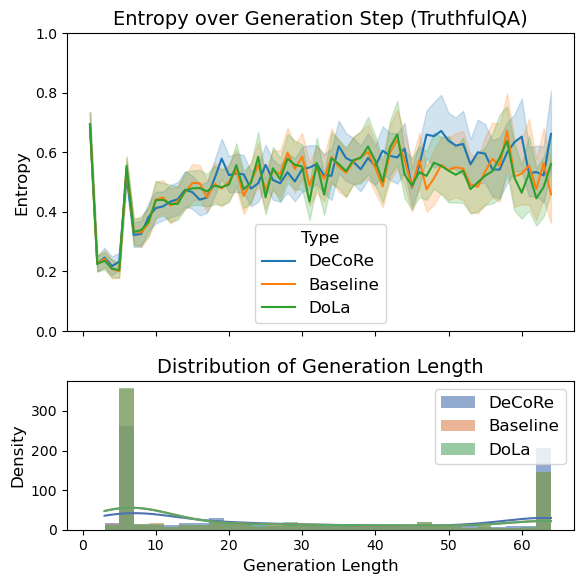

In [10]:
decore_timesteps = np.concatenate([np.arange(1, length+1) for length in decore_lengths])
baseline_timesteps = np.concatenate([np.arange(1, length+1) for length in baseline_lengths])
dola_timesteps = np.concatenate([np.arange(1, length+1) for length in dola_lengths])
timesteps = np.concatenate((decore_timesteps, baseline_timesteps, dola_timesteps))

decore_data_flat = np.concatenate([np.array(alphas) for alphas in decore_alphas])
baseline_data_flat = np.concatenate([np.array(alphas) for alphas in baseline_alphas])
dola_data_flat = np.concatenate([np.array(alphas) for alphas in dola_alphas])

types = ['DeCoRe'] * len(decore_data_flat) + ['Baseline'] * len(baseline_data_flat) + ['DoLa'] * len(dola_data_flat)

data_flat = np.concatenate((decore_data_flat, baseline_data_flat, dola_data_flat))

df = pd.DataFrame({
    'Timestep': timesteps,
    'Alpha': data_flat,
    'Type': types
})

# Set font sizes
plt.rcParams.update({
    'font.size': 12,         # General font size
    'axes.titlesize': 14,    # Title font size
    'axes.labelsize': 12,    # Axis label font size
    'xtick.labelsize': 10,   # X-tick label font size
    'ytick.labelsize': 10,   # Y-tick label font size
    'legend.fontsize': 12,   # Legend font size
    'figure.titlesize': 14   # Figure title font size
})

# Create the figure and subplots with adjusted height ratios
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), sharex=True, gridspec_kw={'height_ratios': [4, 2]})

# Plot the alpha line plot on the first subplot
sns.lineplot(x='Timestep', y='Alpha', hue="Type", data=df, ci=95, ax=ax1)
ax1.set_ylabel('Entropy')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y')
ax1.set_title('Entropy over Generation Step (TruthfulQA)')

# Plot the histogram on the second subplot
sns.histplot(decore_lengths, kde=True, bins=30, color='#4C72B0', ax=ax2, edgecolor=None, label='DeCoRe', alpha=0.6)
sns.histplot(baseline_lengths, kde=True, bins=30, color='#DD8452', ax=ax2, edgecolor=None, label='Baseline', alpha=0.6)
sns.histplot(dola_lengths, kde=True, bins=30, color='#55A868', ax=ax2, edgecolor=None, label='DoLa', alpha=0.6)
ax2.set_xlabel('Generation Length')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right')
ax2.set_title('Distribution of Generation Length')

# Adjust layout to make room for titles and labels
plt.tight_layout()

# Save the figure as a PDF with settings suitable for ICLR publication
plt.savefig('truthfulqa_llama3_8b_instruct_decore_entropy_alpha_generation_step.pdf', format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
# plt.grid(True)
plt.show()

In [11]:
def auec(entropy_values):
    return np.trapz(entropy_values, range(len(entropy_values)))

In [12]:
decore_auecs = []
for alphas in decore_alphas:
    decore_auecs += [auec(alphas)]

baseline_auecs = []
for alphas in baseline_alphas:
    baseline_auecs += [auec(alphas)]

dola_auecs = []
for alphas in dola_alphas:
    dola_auecs += [auec(alphas)]


print("DeCoRe AUEC:", np.mean(decore_auecs))
print("Baseline AUEC:", np.mean(baseline_auecs))
print("DoLa AUEC:", np.mean(dola_auecs))

DeCoRe AUEC: 14.348060370507547
Baseline AUEC: 11.260179229855094
DoLa AUEC: 11.225582226595582


In [14]:
decore_ses = []
for alphas in decore_alphas:
    decore_ses += [sum(alphas)/len(alphas)]

baseline_ses = []
for alphas in baseline_alphas:
    baseline_ses += [sum(alphas)/len(alphas)]

dola_ses = []
for alphas in dola_alphas:
    dola_ses += [sum(alphas)/len(alphas)]


print("DeCoRe Averaged Length-controlled Entropy:", np.mean(decore_ses))
print("Baseline Averaged Length-controlled Entropy:", np.mean(baseline_ses))
print("DoLa Averaged Length-controlled Entropy:", np.mean(dola_ses))

DeCoRe Averaged Length-controlled Entropy: 0.40008279831784677
Baseline Averaged Length-controlled Entropy: 0.3781964217513262
DoLa Averaged Length-controlled Entropy: 0.3772166326950387
